## Reclassify the classified image: 
**- good class (bathymetry) -1**

**- weak class - 5**

**- other classses - 2, 3, 4,..., etc.**



In [ ]:
import os
import numpy as np
import rioxarray
import rasterio as rst
import matplotlib.pyplot as plt
class fonttype:
    BOLD = '\033[1m'
    END = '\033[0m'

In [ ]:
classified = '/ncr2421/SDB_Garmin_Bahamas/18RTQ/20210523/TEST/SDB_ANSU_Weak_v7_class.tif'
bathy = '/ncr2421/SDB_Garmin_Bahamas/18RTQ/20210523/TEST/v07_20210809_bathy.tif'
local_dir = '/ncr2421/SDB_Garmin_Bahamas/18RTQ/20210523/TEST/'

class_codes = {
    'good' : 1,
    'nodata' : 2,
    'interpolate' : 3,
    'extrapolate' : 4,
    'land' : 1,
    'smooth' : 4,
    'outside' :0,
    'weak': 5,
} 

In [ ]:
### Interpolation of eCog raster output ###
def reclassified(classified, class_codes, out_dir=None):
    # Create classification masks
    with rst.open(classified) as src:
        data = src.read(1)
        height, width = data.shape  
        profile = src.profile
        
        data = np.where(data==class_codes['extrapolate'], 5, data)
        data = np.where(data==class_codes['smooth'], 5, data)
        data = np.where(data==class_codes['weak'], 5, data)
        data = np.where(data==class_codes['interpolate'], 5, data)
               
        data = np.where(data==class_codes['good'], 1, data) 
        
        data = np.where(data==class_codes['nodata'],3, data)
        data = np.where(data==class_codes['outside'], 3, data)
        data = np.where(data==class_codes['land'],3, data)
        #data = np.where(data==class_codes['outside'], np.nan, data)

    img_name = classified.split('\\')[-1][:-4]

    out_name = ''
    if out_dir != None:
        out_name = os.path.join(out_dir, f'{img_name}_reclassified.tif')
        with rst.open(out_name, 'w', **profile) as dst:
                dst.write(data.astype(rst.int8), 1)
        
    print('Reclassified file:' + fonttype.BOLD + f'{out_name}' + fonttype.END)
    
    return data, out_name

In [ ]:
grid, out_name =  reclassified(classified, class_codes, out_dir= local_dir)

In [ ]:
# To see input files rasters:
with rst.open(out_name) as src:
    array = src.read(1)
    plt.imshow(array)
    plt.show() 

# C. Clip the SDB with SHP

In [12]:
import geopandas
import os
import rioxarray
import rasterio as rst
import matplotlib.pyplot as plt

class fonttype:
    BOLD = '\033[1m'
    END = '\033[0m'

#raster = grid_path
raster ='/ncr2421/SDB_Garmin_Bahamas/18RTQ/20210523/TEST/SDB_ANSU_Weak_v7_class.tif'
shp ="/ncr2421/SDB_Garmin_Bahamas/18RTQ/AOI_Demo.shp"
out_dir = '/ncr2421/SDB_Garmin_Bahamas/18RTQ/20210523/TEST/'

shp_file = geopandas.read_file(shp)
raster_file = rioxarray.open_rasterio(raster).squeeze()
# transfor to the raster CRS
shp_file_crs = shp_file.to_crs(raster_file.crs)

In [13]:
# clipped = raster_file.rio.clip(shp_file_crs.geometry, shp_file_crs.crs, drop=False, invert=False)
clipped = raster_file.rio.clip(shp_file_crs.geometry)

# Save the clipped raster
img_name = raster.split('\\')[-1][:-4]
out_name = os.path.join(out_dir, f'{img_name}_Clipped.tif')
clipped_AOI = clipped.rio.to_raster(out_name, tiled=True, dtype="float32")
print('Clipped raster:',fonttype.BOLD + f'{out_name}' + fonttype.END )

Clipped raster: /ncr2421/SDB_Garmin_Bahamas/18RTQ/20210523/TEST/SDB_ANSU_Weak_v7_class_Clipped.tif


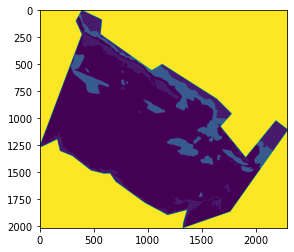

In [14]:
with rst.open(out_name) as src:
    array = src.read(1)
    plt.imshow(array)
    plt.show() 